### Exploratory Data Analysis 

Employee turnover is a key problem faced by many organizations. When good people leave, it usually costs the organization substantial time and other resources to find a replacement. Therefore, many organizations try to keep the churn rate at a low level. Imagine a company who now wants to understand its employee churn situation. Its HR (Human Resources) department gives you some data of their employees, and asks you to do exploratory data analysis and to predict employee churn.

You are free to choose any statistics library to analyze the data. In your answer, please include both the snippets of your code as well as the outputs.

Download the data `termination.csv` and `.ipynb` template from Canvas. Use the downloaded resources to answer the following questions:

#### a. (2 pts) Display a summary of the data (i.e. min, max, mean and quartiles for each variable). In the summary statistics, are there any meaningless quantities?

In [40]:
# Step 1: Load essential packages -- refer to recitation

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# Step 2: load data using read_csv function

In [3]:
df = pd.read_csv('termination.csv')
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [42]:
# step 3: Invoke appropriate function on the loaded data to get the summary statistics

In [4]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


Yes, some statistics on EmployeeID, store_name are not meaningful because they are not numerical values, such as the min, max, mean and quartiles.

#### b. (5 pts) The data include 10 years (2006 - 2015) of records for both active and terminated employees. Status Year field shows the year of data, and Status field shows the employment status – ACTIVE or TERMINATED in the corresponding status year. The company is interested in what proportion of the staff are leaving. Compute: 1) the percent of terminated employees out of all employees for each year; 2) average termination rate over the 10 years?

In [43]:
# Step 1: Create a pivot_table indexing STATUS_YEAR and apply to STATUS column

In [29]:
pivot = pd.pivot_table(df,index=df.STATUS_YEAR, columns=df.STATUS, values = 'EmployeeID',
               aggfunc = 'count')
pivot

STATUS,ACTIVE,TERMINATED
STATUS_YEAR,,
2006,4445,134
2007,4521,162
2008,4603,164
2009,4710,142
2010,4840,123
2011,4972,110
2012,5101,130
2013,5215,105
2014,4962,253


In [20]:
# Step 2: Based on the pivot_table, find total number of employees each year

In [24]:
total = pivot.sum(axis = 1)
total

In [56]:
# Step 3: Now compute the percentage
percentage = pivot.loc[:,'TERMINATED']/total * 100
percentage

STATUS_YEAR
2006    2.926403
2007    3.459321
2008    3.440319
2009    2.926628
2010    2.478340
2011    2.164502
2012    2.485184
2013    1.973684
2014    4.851390
2015    3.265471
dtype: float64

In [34]:
# Step 4: Invoke a function to compute average on the calculated percentage.

In [57]:
average_rate = percentage.mean()
average_rate

2.997124260410164

#### c.(5 pts) In addition to the proportion of terminated employees, the company wants to know more about different types of termination. Give a stacked bar chart of terminates, where x-axis is status year, y-axis is number of terminated employees, and different colors in a bar show different termination reasons (‘termreason desc’ field in the data). What do you observe in this plot?

In [ ]:
# Step 1: Filter dataframe for the relevant status for this question

In [38]:
term_df = df[df['STATUS'] == 'TERMINATED']
term_df[:5]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
48168,3987,9/1/2010 0:00,1945-09-03,1997-03-11,2010-09-03,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2010,TERMINATED,STORES
48169,4107,1/1/2011 0:00,1946-01-12,1997-07-20,2011-01-12,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2011,TERMINATED,STORES
48170,4347,9/1/2006 0:00,1946-09-23,1998-03-31,2006-09-23,60,8,Abbotsford,Bakery,Baker,1,M,Male,Retirement,Voluntary,2006,TERMINATED,STORES
48171,4263,6/1/2011 0:00,1946-06-22,1997-12-28,2011-06-22,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2011,TERMINATED,STORES
48172,4707,10/1/2012 0:00,1947-10-30,1999-05-07,2012-10-30,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2012,TERMINATED,STORES


In [53]:
# Step 2: Similar to part (b) create pivot table on column termreason_desc

In [43]:
term_pivot = term_df.pivot_table(index = 'STATUS_YEAR', columns = 'termreason_desc',values = 'EmployeeID', 
                                 fill_value = 0, aggfunc = 'count')
term_pivot

termreason_desc,Layoff,Resignaton,Retirement
STATUS_YEAR,,,
2006,0,12,122
2007,0,25,137
2008,0,26,138
2009,0,18,124
2010,0,29,94
2011,0,69,41
2012,0,76,54
2013,0,49,56
2014,142,55,56


In [57]:
# Step 3: Plot stacked bar chart using pandas plot bar function


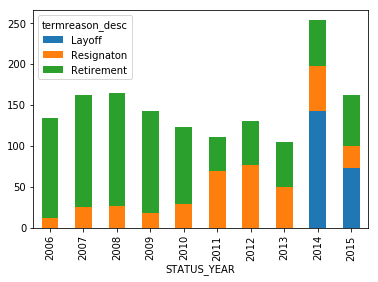

In [46]:
term_pivot.plot.bar(stacked = True)

From the plot, we can see there is no Layoff termination prior to 2014. Retirement was the main type of termination from 2006 to 2011. Between 2011 to 2013, increasing employees resignated. Starting from 2014, termination due to layoff largely increased, and became the bigest factor among termination.

#### d. (3 pts) Does Age affect termination? Draw (2) Box-plots of Age for active and terminated employees separately. What does the box-plot tell you?

In [58]:
# Step 1: Use pandas boxplot for this part

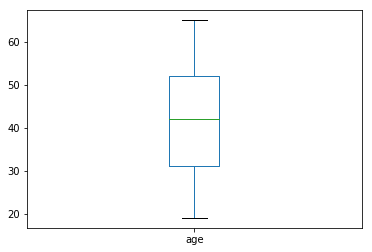

In [54]:
age_active = df[df['STATUS'] == 'ACTIVE']['age'].plot.box()

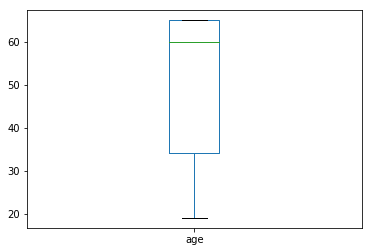

In [55]:
age_terminated = df[df['STATUS'] == 'TERMINATED']['age'].plot.box()

Comparing two box plots, we can see age does correlated with termination. Between active and terminated employees, the range of the age is approximated the same, whereas terminated employees have higher median of around 59, compared to around 41 in active employees. In addition, the third quartile and the max are the same in the terminated population, meaning the oldest 25 percent terminated were of the same age, possibly because of retirement.